In [1]:
import pandas as pd
from itertools import product
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



transforming the csv list into tuples 

In [3]:
import csv


file_name = 'wine.csv'
wines_list = []
with open(file_name, 'r') as file:  
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        # Convert each row to a tuple (assuming 2 entries per row)
        wines_list.append(tuple(map(float, row)))  # Convert to float for numerical data
print(wines_list)        


[(3.92, 1065.0), (3.4, 1050.0), (3.17, 1185.0), (3.45, 1480.0), (2.93, 735.0), (2.85, 1450.0), (3.58, 1290.0), (3.58, 1295.0), (2.85, 1045.0), (3.55, 1045.0), (3.17, 1510.0), (2.82, 1280.0), (2.9, 1320.0), (2.73, 1150.0), (3.0, 1547.0), (2.88, 1310.0), (2.65, 1280.0), (2.57, 1130.0), (2.82, 1680.0), (3.36, 845.0), (3.71, 780.0), (3.52, 770.0), (4.0, 1035.0), (3.63, 1015.0), (3.82, 845.0), (3.2, 830.0), (3.22, 1195.0), (2.77, 1285.0), (3.4, 915.0), (3.59, 1035.0), (2.71, 1285.0), (2.88, 1515.0), (2.87, 990.0), (3.0, 1235.0), (2.87, 1095.0), (3.47, 920.0), (2.78, 880.0), (2.51, 1105.0), (2.69, 1020.0), (3.53, 760.0), (3.38, 795.0), (3.0, 1035.0), (3.56, 1095.0), (3.0, 680.0), (3.35, 885.0), (3.33, 1080.0), (3.44, 1065.0), (3.33, 985.0), (2.75, 1060.0), (3.1, 1260.0), (2.91, 1150.0), (3.37, 1265.0), (3.26, 1190.0), (2.93, 1375.0), (3.2, 1060.0), (3.03, 1120.0), (3.31, 970.0), (2.84, 1270.0), (2.87, 1285.0), (1.82, 520.0), (1.67, 680.0), (1.59, 450.0), (2.46, 630.0), (2.87, 420.0), (2.23, 

plotting the data for visualisation 

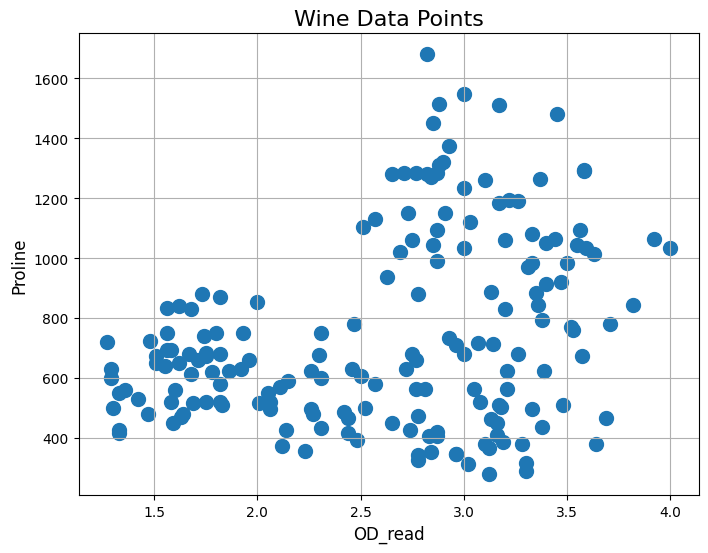

In [4]:


x_values = [point[0] for point in wines_list]  # First value in each tuple
y_values = [point[1] for point in wines_list]  # Second value in each tuple

# Plot the points
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(x_values, y_values, marker='o', s=100)  # Scatter plot with circle markers

# Add labels and a title
plt.title("Wine Data Points", fontsize=16)
plt.xlabel("OD_read", fontsize=12)
plt.ylabel("Proline", fontsize=12)

# Show the plot
plt.grid(True) 
plt.show()

Applying the first method for classification: k-means

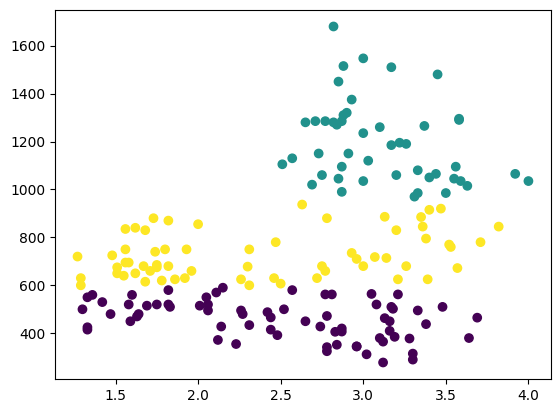

In [5]:
from sklearn.cluster import KMeans
km = KMeans(3)
plt.scatter (x_values, y_values, c = km.fit_predict(wines_list))

the data on the graph does not look like k-means structure with the circles cause of the difference of scale

Applying silhouette score to check how well the model performs 

In [10]:
from sklearn.metrics import silhouette_score
print("k_means", silhouette_score(wines_list, km.fit_predict(wines_list)))

k_means 0.5809421087616886


A silhouette score of 0.5809 is generally considered good. 0.50 - 0.75: Good clustering; clusters are well-formed and distinct.

Hierarchical Clustering

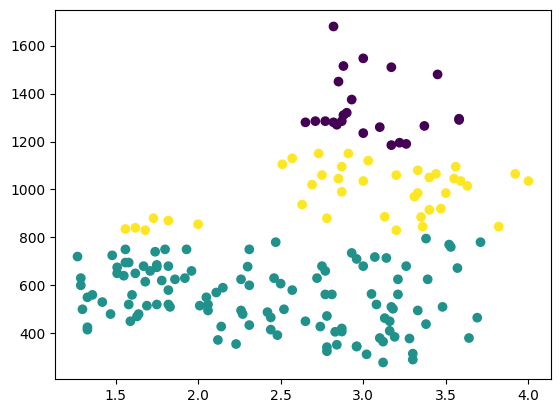

In [11]:

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wines_list)
plt.scatter (x_values, y_values, c = ac.fit_predict(wines_list))

In [12]:
print("agglomerative clustering", silhouette_score(wines_list, ac.fit_predict(wines_list)))

agglomerative clustering 0.5988495817462


We can see that the hierarchical clustering performs better than k-means 

DBSCAN method

[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0  3  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  3  1
  1  0  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


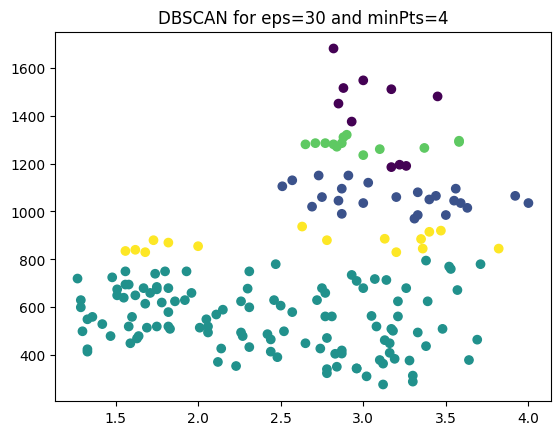

DBSCAN: parameters epsilon 30, minPoints 4. Silhouette score:  0.4847577796882892
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  0  1  1  0  0
  0  0 -1  2  0  0  2 -1  0  2  0  0  0  0  0  1  1  0  0  1  0  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  0  1
  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  0  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  0  0  1]


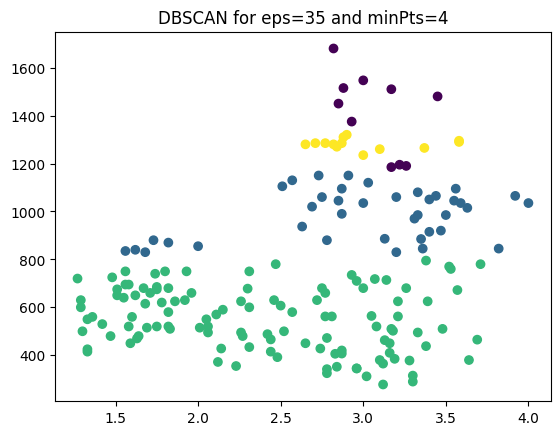

DBSCAN: parameters epsilon 35, minPoints 4. Silhouette score:  0.5647985940010407
[ 0  0  0  1  0  1  2  2  0  0  1  2  2  0  1  2  2  0 -1  0  0  0  0  0
  0  0  0  2  0  0  2  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  0  2  0 -1  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]


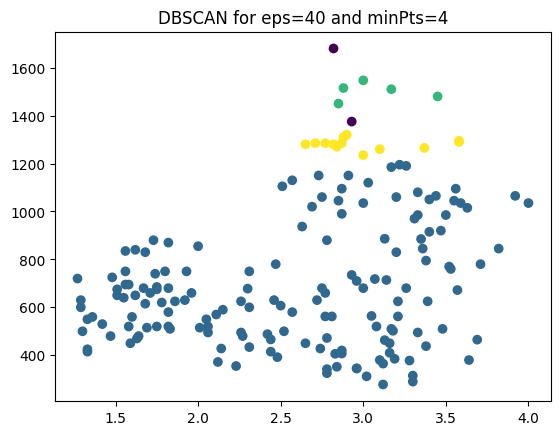

DBSCAN: parameters epsilon 40, minPoints 4. Silhouette score:  0.4773994941755832
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0 -1  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  3  1
  1  0  3  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


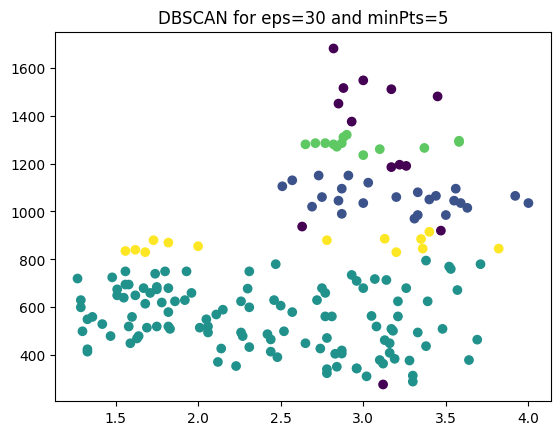

DBSCAN: parameters epsilon 30, minPoints 5. Silhouette score:  0.43763797761597306
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0  3  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  3  1
  1  0  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


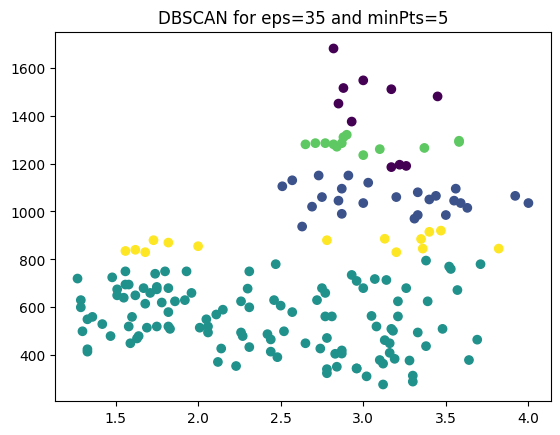

DBSCAN: parameters epsilon 35, minPoints 5. Silhouette score:  0.4735470221596424
[ 0  0  0 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  1  1  1  0  0
  1  1  0  2  1  0  2 -1  0  2  0  1  1  0  0  1  1  0  0  1  1  0  0  0
  0  2  0  2  0 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


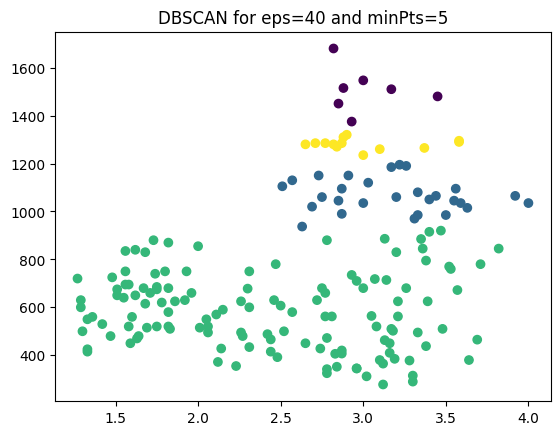

DBSCAN: parameters epsilon 40, minPoints 5. Silhouette score:  0.5739675293567901
[ 0  0  0 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  1  1  1  0  0
  1  1  0  2  1  0  2 -1  0  2  0  1  1  0  0  1  1  0  0  1  1  0  0  0
  0  2  0  2  0 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


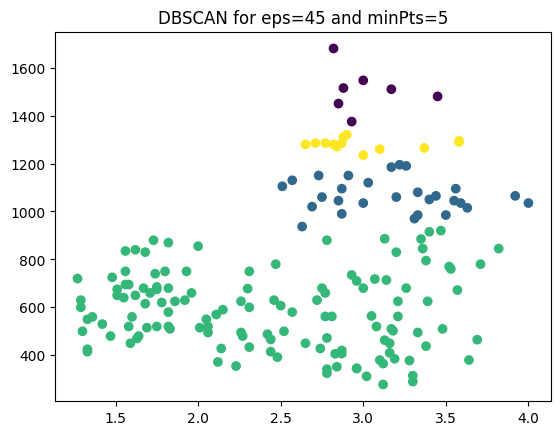

DBSCAN: parameters epsilon 45, minPoints 5. Silhouette score:  0.5739675293567901


In [32]:
# parameter setting as a list of tuples 
P=[(30, 4), (35, 4), (40, 4), (30, 5), (35, 5), (40, 5), (45,5)]
#loop through each tuple
for eps, minPts in P:
    db = DBSCAN(eps,min_samples=minPts,  metric='manhattan')
    print(db.fit_predict(wines_list)) #different numbers mean different clusters and -1 means noise 
    plt.scatter(x_values, y_values, c=db.fit_predict(wines_list))
    plt.title("DBSCAN for eps=%s and minPts=%s" % (eps, minPts))
    plt.show()
    pr = P[0]
    print(f"DBSCAN: parameters epsilon {eps}, minPoints {minPts}. Silhouette score: ", silhouette_score(wines_list, db.fit_predict(wines_list)))

We can see that the best results of the DBSCAN were achieved with the following hyperparamethers: 

parameters epsilon 35, minPoints 4. Silhouette score:  0.5647985940010407

parameters epsilon 40, minPoints 5. Silhouette score:  0.5739675293567901

parameters epsilon 45, minPoints 5. Silhouette score:  0.5739675293567901



Comparison of different approaches by their silhouette rate: 
k_means 0.5809421087616886 

agglomerative clustering 0.5988495817462

parameters epsilon 40, minPoints 5. :  0.5739675293567901

We can conclude that with our choice of hyperparamethers, the best prediction model was agglomerative clustering
